In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from lassonet import LassoNetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [3]:
# 月度指数收益率数据
hs_index_month = pd.read_csv('../../data/final/hs300_ret_monthly(2013-2022).csv').set_index("trade_date")["return_t+1(%)"]
hs_index_month 

trade_date
201301    0.426500
201302   -0.174000
201303   -0.309524
201304   -0.090556
201305    0.280455
            ...   
202208   -0.148696
202209   -0.390476
202210   -0.134375
202211    0.324091
202212   -0.024091
Name: return_t+1(%), Length: 120, dtype: float64

In [13]:
# 月度宏观经济数据+月度指数收益率数据
marco_data =  pd.read_csv('../../data/final/all_macro.CSV', encoding="gbk", index_col=0)
marco_data.index = pd.to_datetime(marco_data.index)
marco_data = marco_data.shift(-1)['20130101':'20221231'].resample('M').mean().dropna(axis=0, how='all')
marco_data.index = marco_data.index.strftime('%Y%m')
marco_data["return_t+1(%)"] = hs_index_month.values[:-1]
marco_data

,银行间同业拆借加权利率:1个月:月:平均值,7天回购利率:加权平均:最近1月(B1M):月:平均值,银行间质押式回购加权利率:1个月:月:平均值,活期存款利率(月),定期存款利率:3个月(月),定期存款利率:6个月(月),定期存款利率:1年(整存整取)(月),定期存款利率:3年(整存整取)(月),人民银行对金融机构存款利率:法定准备金(月),人民银行对金融机构存款利率:超额准备金(月),...,万得全A:月:平均值,成交金额:万得全A:月:平均值,成交量:万得全A:月:平均值,静态市盈率:万得全A:月:平均值,滚动市盈率(TTM):万得全A:月:平均值,市净率:万得全A:月:平均值,Wind行业指数:工业:月:平均值,中债国债到期收益率:1个月,中债国债到期收益率:1年,return_t+1(%)
指标名称,,,,,,,,,,,,,,,,,,,,,
201301,3.827433,3.174647,3.854060,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,2355.763033,2.001366e+08,204050820.1,14.668625,14.793500,1.862261,2157.172233,1.5078,1.7000,0.426500
201302,3.482276,3.301505,3.455576,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,2301.033648,1.829666e+08,189427128.6,14.159529,14.268323,1.788571,2101.696671,1.4788,1.7331,-0.174000
201303,3.548621,3.211562,3.576019,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,2222.911206,1.418688e+08,146882130.2,13.527907,13.560423,1.688423,2021.514228,1.4520,1.7210,-0.309524
201304,3.673742,3.415759,3.766359,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,2334.900959,1.983724e+08,195529747.8,14.131587,13.745352,1.697471,2136.758468,1.4500,1.7192,-0.090556
201305,7.175700,5.566932,7.501516,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,2204.298006,1.661773e+08,172556384.6,13.454820,13.087310,1.632460,2038.107259,1.4620,1.7250,0.280455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202207,1.794648,1.563152,1.713400,0.35,1.1,1.3,1.5,2.75,1.62,0.35,...,5210.439687,1.005638e+09,776680451.5,17.980981,17.581377,1.755003,4834.572665,1.7065,2.0403,-0.300952
202208,2.001605,1.637848,1.913110,0.35,1.1,1.3,1.5,2.75,1.62,0.35,...,4940.398581,7.271462e+08,618604624.3,17.381080,17.000253,1.654413,4515.481648,1.6853,2.0416,-0.148696
202209,2.058167,1.765900,1.899694,0.35,1.1,1.3,1.5,2.75,1.62,0.35,...,4704.755006,7.928845e+08,635283912.5,16.637377,16.213729,1.577403,4379.784031,1.6906,2.0419,-0.390476


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(marco_data.iloc[:, :-1].values)
y_scaled = scaler.fit_transform(marco_data.iloc[:, -1].values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(95, 192) (24, 192) (95, 1) (24, 1)


In [17]:
# 示例特征(指标)名字
feature_names = [f'fea{i}' for i in range(1,X_train.shape[1] + 1)]
print(feature_names)

['fea1', 'fea2', 'fea3', 'fea4', 'fea5', 'fea6', 'fea7', 'fea8', 'fea9', 'fea10', 'fea11', 'fea12', 'fea13', 'fea14', 'fea15', 'fea16', 'fea17', 'fea18', 'fea19', 'fea20', 'fea21', 'fea22', 'fea23', 'fea24', 'fea25', 'fea26', 'fea27', 'fea28', 'fea29', 'fea30', 'fea31', 'fea32', 'fea33', 'fea34', 'fea35', 'fea36', 'fea37', 'fea38', 'fea39', 'fea40', 'fea41', 'fea42', 'fea43', 'fea44', 'fea45', 'fea46', 'fea47', 'fea48', 'fea49', 'fea50', 'fea51', 'fea52', 'fea53', 'fea54', 'fea55', 'fea56', 'fea57', 'fea58', 'fea59', 'fea60', 'fea61', 'fea62', 'fea63', 'fea64', 'fea65', 'fea66', 'fea67', 'fea68', 'fea69', 'fea70', 'fea71', 'fea72', 'fea73', 'fea74', 'fea75', 'fea76', 'fea77', 'fea78', 'fea79', 'fea80', 'fea81', 'fea82', 'fea83', 'fea84', 'fea85', 'fea86', 'fea87', 'fea88', 'fea89', 'fea90', 'fea91', 'fea92', 'fea93', 'fea94', 'fea95', 'fea96', 'fea97', 'fea98', 'fea99', 'fea100', 'fea101', 'fea102', 'fea103', 'fea104', 'fea105', 'fea106', 'fea107', 'fea108', 'fea109', 'fea110', 'fea111

In [22]:
# 特征数量
n_features = X_scaled.shape[1]

In [30]:
# 模型
model = LassoNetRegressor(
    hidden_dims=(32,),
    verbose=True,
    patience=(100, 20),
)

path = model.path(X_train, y_train)

n_selected = []
mse = []
lambda_ = []

for save in path:
    model.load(save.state_dict)
    y_pred = model.predict(X_test)
    n_selected.append(save.selected.sum().cpu().numpy())
    mse.append(mean_squared_error(y_test, y_pred))
    lambda_.append(save.lambda_)


epoch: 0
loss: 1.614925742149353
epoch: 1
loss: 1.3152170181274414
epoch: 2
loss: 1.1226717233657837
epoch: 3
loss: 1.0397762060165405
epoch: 4
loss: 1.0232781171798706
epoch: 5
loss: 1.0273423194885254
epoch: 6
loss: 1.018591046333313
epoch: 7
loss: 0.9886722564697266
epoch: 8
loss: 0.9444237351417542
epoch: 9
loss: 0.8962810039520264
epoch: 10
loss: 0.8533050417900085
epoch: 11
loss: 0.8217555284500122
epoch: 12
loss: 0.8035471439361572
epoch: 13
loss: 0.7951523661613464
epoch: 14
loss: 0.7902273535728455
epoch: 15
loss: 0.7837514281272888
epoch: 16
loss: 0.7721641063690186
epoch: 17
loss: 0.7549727559089661
epoch: 18
loss: 0.7345287799835205
epoch: 19
loss: 0.7142581343650818
epoch: 20
loss: 0.6972905993461609
epoch: 21
loss: 0.6847308874130249
epoch: 22
loss: 0.67623370885849
epoch: 23
loss: 0.6704462170600891
epoch: 24
loss: 0.6654776930809021
epoch: 25
loss: 0.6592563390731812
epoch: 26
loss: 0.6507868766784668
epoch: 27
loss: 0.6402671337127686
epoch: 28
loss: 0.6286146640777588

Text(0, 0.5, 'number of selected features')

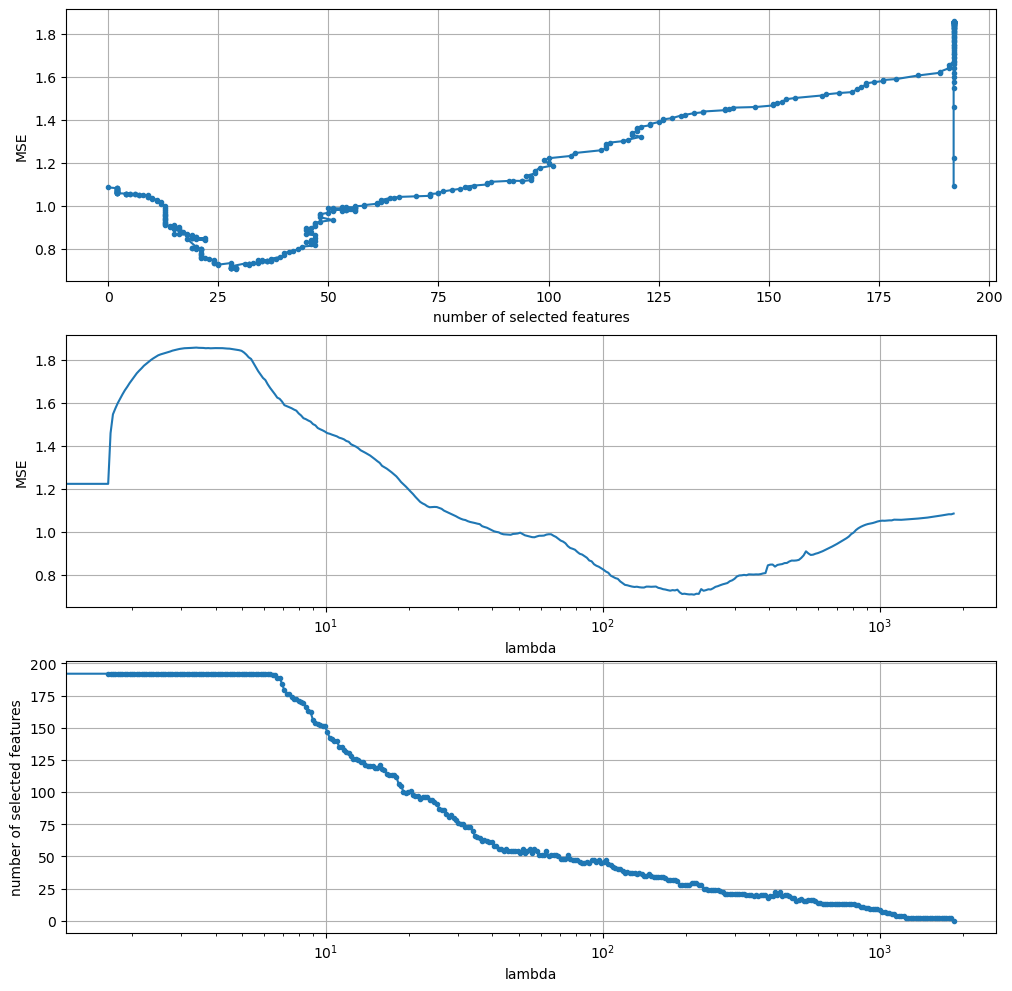

In [31]:
fig = plt.figure(figsize=(12, 12))
plt.subplot(311)
plt.grid(True)
plt.plot(n_selected, mse, ".-")
plt.xlabel("number of selected features")
plt.ylabel("MSE")

plt.subplot(312)
plt.grid(True)
plt.plot(lambda_, mse, "-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("MSE")

plt.subplot(313)
plt.grid(True)
plt.plot(lambda_, n_selected, ".-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("number of selected features")


Text(0.5, 1.0, 'Top 50 feature importances')

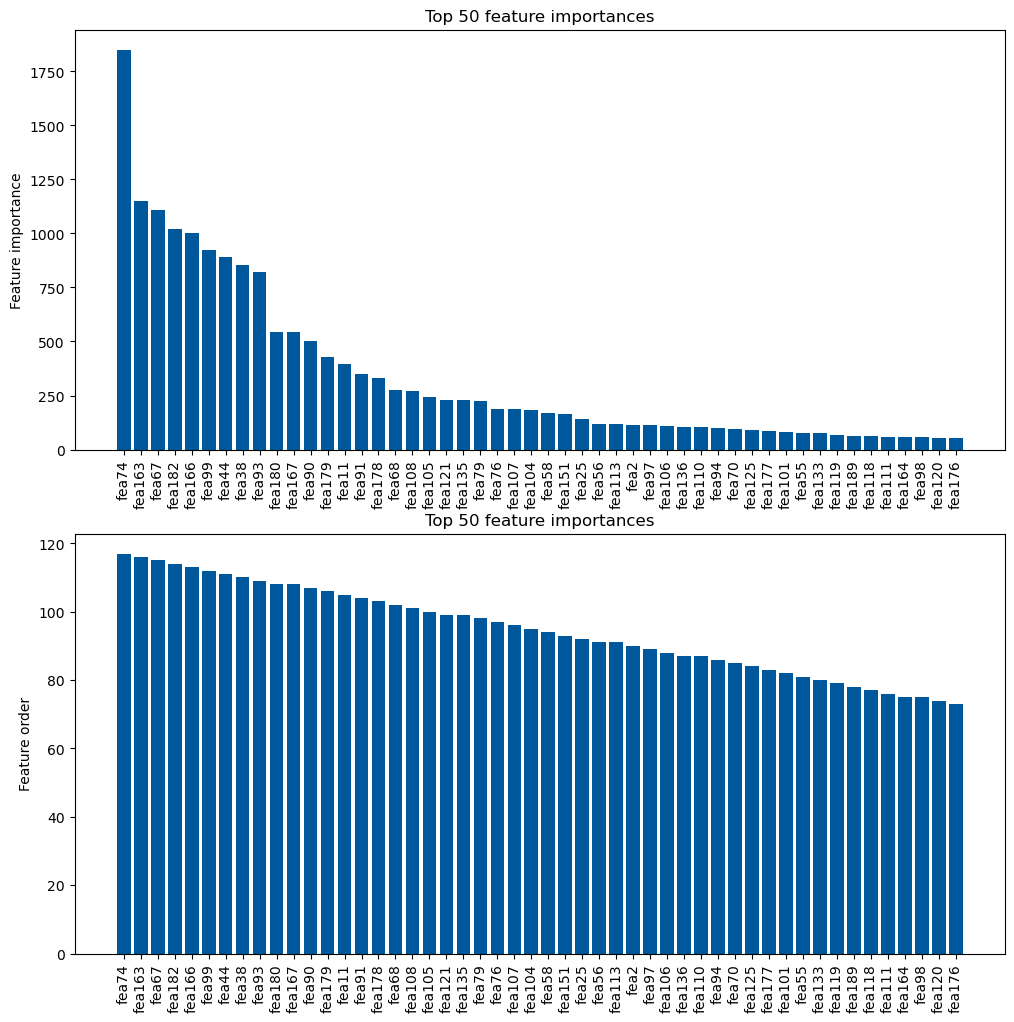

In [56]:
n_features = X_scaled.shape[1]
importances = model.feature_importances_.numpy()
order = np.argsort(importances)[::-1]
importances = importances[order]
ordered_feature_names = [feature_names[i] for i in order]

# 只选择排名前50的数据
top_n = 50
importances_top_n = importances[:top_n]
ordered_feature_names_top_n = ordered_feature_names[:top_n]

plt.figure(figsize=(12, 12))

plt.subplot(211)
plt.bar(
    np.arange(top_n),
    importances_top_n,
    color='#00589c',
)
plt.xticks(np.arange(top_n), ordered_feature_names_top_n, rotation=90)
plt.ylabel("Feature importance")
plt.title("Top 50 feature importances")

_, order = np.unique(importances, return_inverse=True)

plt.subplot(212)
plt.bar(
    np.arange(top_n),
    order[:top_n] + 1,
    color='#00589c',
)
plt.xticks(np.arange(top_n), ordered_feature_names_top_n, rotation=90)
plt.ylabel("Feature order")
plt.title("Top 50 feature importances")


In [57]:
ordered_feature_names_top_n

['fea74',
 'fea163',
 'fea67',
 'fea182',
 'fea166',
 'fea99',
 'fea44',
 'fea38',
 'fea93',
 'fea180',
 'fea167',
 'fea90',
 'fea179',
 'fea11',
 'fea91',
 'fea178',
 'fea68',
 'fea108',
 'fea105',
 'fea121',
 'fea135',
 'fea79',
 'fea76',
 'fea107',
 'fea104',
 'fea58',
 'fea151',
 'fea25',
 'fea56',
 'fea113',
 'fea2',
 'fea97',
 'fea106',
 'fea136',
 'fea110',
 'fea94',
 'fea70',
 'fea125',
 'fea177',
 'fea101',
 'fea55',
 'fea133',
 'fea119',
 'fea189',
 'fea118',
 'fea111',
 'fea164',
 'fea98',
 'fea120',
 'fea176']

In [42]:
marco_data_selected = marco_data.copy().drop("return_t+1(%)", axis=1)
# 列名改为fea1,fea2,fea3...

marco_data_selected

,银行间同业拆借加权利率:1个月:月:平均值,7天回购利率:加权平均:最近1月(B1M):月:平均值,银行间质押式回购加权利率:1个月:月:平均值,活期存款利率(月),定期存款利率:3个月(月),定期存款利率:6个月(月),定期存款利率:1年(整存整取)(月),定期存款利率:3年(整存整取)(月),人民银行对金融机构存款利率:法定准备金(月),人民银行对金融机构存款利率:超额准备金(月),...,成交金额:上证综合指数:月:平均值,万得全A:月:平均值,成交金额:万得全A:月:平均值,成交量:万得全A:月:平均值,静态市盈率:万得全A:月:平均值,滚动市盈率(TTM):万得全A:月:平均值,市净率:万得全A:月:平均值,Wind行业指数:工业:月:平均值,中债国债到期收益率:1个月,中债国债到期收益率:1年
指标名称,,,,,,,,,,,,,,,,,,,,,
201301,3.827433,3.174647,3.854060,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,1084.818159,2355.763033,2.001366e+08,204050820.1,14.668625,14.793500,1.862261,2157.172233,1.5078,1.7000
201302,3.482276,3.301505,3.455576,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,971.347982,2301.033648,1.829666e+08,189427128.6,14.159529,14.268323,1.788571,2101.696671,1.4788,1.7331
201303,3.548621,3.211562,3.576019,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,713.981525,2222.911206,1.418688e+08,146882130.2,13.527907,13.560423,1.688423,2021.514228,1.4520,1.7210
201304,3.673742,3.415759,3.766359,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,948.535532,2334.900959,1.983724e+08,195529747.8,14.131587,13.745352,1.697471,2136.758468,1.4500,1.7192
201305,7.175700,5.566932,7.501516,0.35,2.6,2.8,3.0,4.25,1.62,0.72,...,782.375961,2204.298006,1.661773e+08,172556384.6,13.454820,13.087310,1.632460,2038.107259,1.4620,1.7250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202207,1.794648,1.563152,1.713400,0.35,1.1,1.3,1.5,2.75,1.62,0.35,...,4125.006230,5210.439687,1.005638e+09,776680451.5,17.980981,17.581377,1.755003,4834.572665,1.7065,2.0403
202208,2.001605,1.637848,1.913110,0.35,1.1,1.3,1.5,2.75,1.62,0.35,...,3122.541497,4940.398581,7.271462e+08,618604624.3,17.381080,17.000253,1.654413,4515.481648,1.6853,2.0416
202209,2.058167,1.765900,1.899694,0.35,1.1,1.3,1.5,2.75,1.62,0.35,...,3403.366820,4704.755006,7.928845e+08,635283912.5,16.637377,16.213729,1.577403,4379.784031,1.6906,2.0419


In [46]:
feature_label_lst = []
for i in range(n_features):
    feature_label_lst.append(f'fea{i+1}')
feature_label_lst

['fea1',
 'fea2',
 'fea3',
 'fea4',
 'fea5',
 'fea6',
 'fea7',
 'fea8',
 'fea9',
 'fea10',
 'fea11',
 'fea12',
 'fea13',
 'fea14',
 'fea15',
 'fea16',
 'fea17',
 'fea18',
 'fea19',
 'fea20',
 'fea21',
 'fea22',
 'fea23',
 'fea24',
 'fea25',
 'fea26',
 'fea27',
 'fea28',
 'fea29',
 'fea30',
 'fea31',
 'fea32',
 'fea33',
 'fea34',
 'fea35',
 'fea36',
 'fea37',
 'fea38',
 'fea39',
 'fea40',
 'fea41',
 'fea42',
 'fea43',
 'fea44',
 'fea45',
 'fea46',
 'fea47',
 'fea48',
 'fea49',
 'fea50',
 'fea51',
 'fea52',
 'fea53',
 'fea54',
 'fea55',
 'fea56',
 'fea57',
 'fea58',
 'fea59',
 'fea60',
 'fea61',
 'fea62',
 'fea63',
 'fea64',
 'fea65',
 'fea66',
 'fea67',
 'fea68',
 'fea69',
 'fea70',
 'fea71',
 'fea72',
 'fea73',
 'fea74',
 'fea75',
 'fea76',
 'fea77',
 'fea78',
 'fea79',
 'fea80',
 'fea81',
 'fea82',
 'fea83',
 'fea84',
 'fea85',
 'fea86',
 'fea87',
 'fea88',
 'fea89',
 'fea90',
 'fea91',
 'fea92',
 'fea93',
 'fea94',
 'fea95',
 'fea96',
 'fea97',
 'fea98',
 'fea99',
 'fea100',
 'fea101

In [66]:
# 匹配特征名和特征序号
selected_columns = pd.DataFrame(marco_data_selected.columns, columns=["feature_name"])
selected_columns["feature_label"] = feature_label_lst
selected_columns["feature_selected"] = selected_columns["feature_label"].apply(lambda x: 1 if x in ordered_feature_names_top_n else 0)
selected_columns = selected_columns[selected_columns["feature_selected"] == 1]

In [69]:
# 最终提取到的特征(Top50)
marcoFeature_selected = selected_columns["feature_name"]

marcoFeature_selected.to_csv("../../data/final/marcoFeature_selected.csv", index=False)
marcoFeature_selected

1          7天回购利率:加权平均:最近1月(B1M):月:平均值
10                    短期贷款利率:6个月(含)(月)
24                  中债国债到期收益率:5年:月:平均值
37                  中间价:新西兰元兑人民币:月:平均值
43                银行间同业拆借:成交金额:30天:当月值
54                  金融机构:本外币贷款余额:初值:同比
55                    金融机构:新增人民币贷款:当月值
57                      金融机构:各项存款余额:同比
66                 货币当局:储备货币:其他存款性公司存款
67                           货币当局:国外负债
69                           货币当局:自有资金
73                               M0:同比
75                               M1:同比
78                           现金净投放:当月值
89                      基础货币余额:同比:月:均值
90                     出口价格指数(HS2):总指数
92                   出口价格指数(BEC):食品和饮料
93                     出口价格指数(BEC):加工品
96     出口价格指数(BEC):资本货品(运输设备除外)及其零件和附件
97             出口价格指数(BEC):运输设备及其零件和附件
98                 出口价格指数(BEC):未列名的消费品
100                    进口价格指数(BEC):加工品
103    进口价格指数(BEC):资本货品(运输设备除外)及其零件和附件
104            进口价格指数(BEC):运输设备及其零件和附件
105                进口价格指数(BEC):未列名的消费品
106            进口价格指数(BEC

In [72]:
marcoData_selected = marco_data[marcoFeature_selected]
marcoData_selected.to_csv("../../data/final/marcoData_selected.csv", index=True)
marcoData_selected

,7天回购利率:加权平均:最近1月(B1M):月:平均值,短期贷款利率:6个月(含)(月),中债国债到期收益率:5年:月:平均值,中间价:新西兰元兑人民币:月:平均值,银行间同业拆借:成交金额:30天:当月值,金融机构:本外币贷款余额:初值:同比,金融机构:新增人民币贷款:当月值,金融机构:各项存款余额:同比,货币当局:储备货币:其他存款性公司存款,货币当局:国外负债,...,GDP:初步核算数:当季同比:月:均值,社会融资规模:当月值,社会融资规模:累计值,上证所:平均市盈率,上证所:A股平均市盈率,上证综合指数:月:平均值,上证A股指数:月:平均值,换手率:上证综合指数:月:平均值,涨跌幅:上证综合指数:月:平均值,市净率:万得全A:月:平均值
指标名称,,,,,,,,,,,,,,,,,,,,,
201301,3.174647,5.60,3.276600,5.223280,336.89,16.1,6200.0,14.6,184549.71,1076.51,...,2.566667,10705.0,36151.45,12.90,12.89,2380.363400,2491.569000,0.619347,-0.047874,1.862261
201302,3.301505,5.60,3.291057,5.146524,766.60,16.0,10625.0,15.6,192318.96,1295.98,...,2.566667,25503.0,61654.00,12.19,12.18,2296.431095,2403.647571,0.561943,-0.256607,1.788571
201303,3.211562,5.60,3.204062,5.237842,588.26,16.1,7923.0,16.2,190587.96,1267.65,...,2.500000,17629.0,79283.00,11.89,11.89,2211.796056,2314.957778,0.420194,-0.142696,1.688423
201304,3.415759,5.60,3.129682,5.060916,748.42,15.6,6694.0,16.2,189818.91,1220.51,...,2.500000,11871.0,91154.00,11.81,11.81,2264.514773,2370.196409,0.525509,0.252207,1.697471
201305,5.566932,5.60,3.323942,4.852271,160.51,15.1,8628.0,14.3,197945.13,1127.07,...,2.500000,10375.0,101529.00,10.17,10.16,2119.149176,2217.954235,0.455676,-0.869303,1.632460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202207,1.563152,4.35,2.433791,4.258252,286.77,10.4,12500.0,11.3,202148.65,1537.76,...,1.300000,24712.0,242534.00,13.11,11.99,3243.600026,3398.689978,0.723526,-0.065077,1.755003
202208,1.637848,4.35,2.453162,4.153495,251.45,10.7,24700.0,11.3,216253.70,1465.69,...,1.300000,35411.0,277730.00,12.45,11.38,3152.124776,3303.268281,0.615943,-0.267807,1.654413
202209,1.765900,4.35,2.497361,4.064206,368.38,10.5,6152.0,10.8,208542.63,1686.47,...,0.966667,9134.0,286864.00,11.96,10.76,3006.106050,3150.298038,0.602000,-0.269961,1.577403
